In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PlotSettings import MainColor1, MainColor2, MainColor3, BackgroundColor1, BackgroundColor2, BackgroundColor3
from CrossSections import Transfer_sigma, Normalized_Transer, Transfer_SigmaV, Normalized_SigmaV

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_36756\3214863599.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


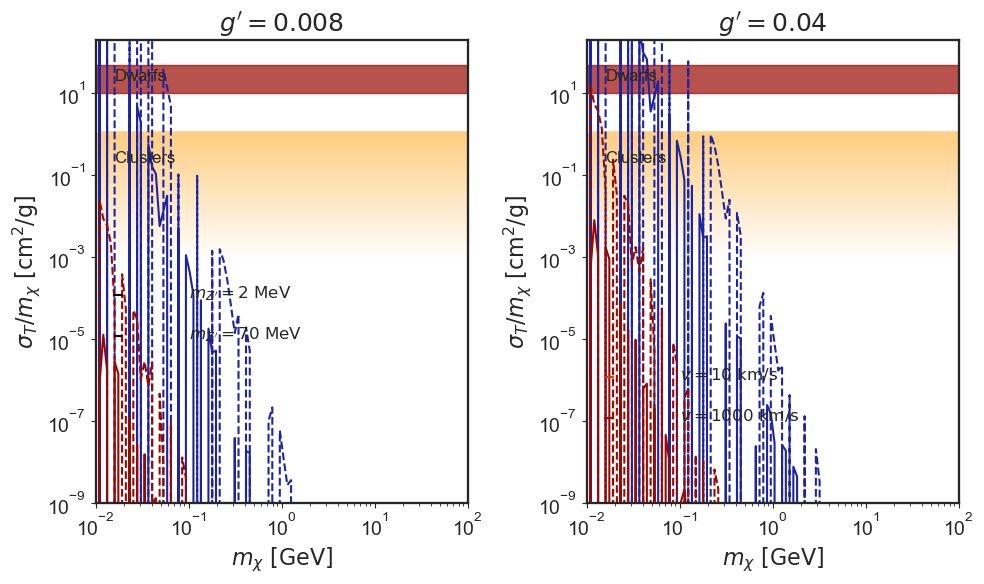

In [37]:
# Arrays
mDM_array = np.logspace(-2, 2, 100)

v0 = (10, 1000)
M = (2, 10)
gp = ( 8e-3, 4e-2 )

line_colors = (MainColor1, MainColor2)
line_styles = ('-', 'dashed')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(c1)
    c2=np.array(c2)
    return (1-mix)*c1 + mix*c2

n = 500
c1 = BackgroundColor2  # yellow
c2 = (1, 1, 1)  # white
y_values = np.logspace(-3, 0, n+1)  # Generate logarithmically spaced values


#Plots
fig, ax = plt.subplots(1, 2, figsize=(10,6))


for i in range(2):

    #ax[i].text(2e-2, 1e-2, r'$ g^{{\prime}} = {}$'.format(gp[i]))
    ax[i].set_title(r'$ g^{{\prime}} = {}$'.format(gp[i]))
        

    
    ax[i].text(mDM_array[5], 0.2, 'Clusters')
    for y in y_values:
        ax[i].axhline(y, mDM_array[0], mDM_array[-1], color=colorFader(c2, c1, (np.log10(y) + 3) / 4), linewidth=4)
    
    ax[i].text(mDM_array[5], 20, 'Dwarfs')
    ax[i].fill_between([mDM_array[0], mDM_array[-1]], 10, 50, color=MainColor2, alpha=0.7)

    
    for j in range(2):
        sm_T1 = [Transfer_sigma(v0[j], gp[i], M[0], m) for m in mDM_array]
        sm_T2 = [Transfer_sigma(v0[j], gp[i], M[1], m) for m in mDM_array]
    
        ax[i].plot(mDM_array, sm_T1, linestyle=line_styles[0], color=line_colors[j], label=r'$m_{{Z\prime}}= {} \mathrm{{MeV}}$'.format(M[0]*1e3) )
        ax[i].plot(mDM_array, sm_T2, linestyle=line_styles[1], color=line_colors[j],  label=r'$m_{{Z\prime}}= {} \mathrm{{MeV}}$'.format(M[1]*1e3) )




    ax[i].set_ylabel(r'$\sigma_T /m_{\chi} ~[ \mathrm{cm^2/g}]$')
    ax[i].set_xlabel(r'$m_{{\chi}} ~[\mathrm{GeV} ] $')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlim(mDM_array[0], mDM_array[-1])
    ax[i].set_ylim(1e-9, 200)
    #ax[i].legend()


# Mass legends
Leg_x = 0.1
hline_x1 = 0.05
hline_x2 = 0.07
leg_m1 = 1e-4 #mass 1
leg_m2 = 1e-5 #mass 2
leg_v1 = 1e-6 #vel 1
leg_v2 = 1e-7 #vel 2
                

ax[0].axhline(1.2*leg_m1, hline_x1, hline_x2,  color='k')
ax[0].axhline(1.2*leg_m2, hline_x1, hline_x2,  color='k', linestyle='dashed')
ax[0].text(Leg_x, leg_m1, r'$m_{Z^{\prime}} = 2~\mathrm{MeV}$')
ax[0].text(Leg_x, leg_m2, r'$m_{Z^{\prime}} = 70~\mathrm{MeV}$')

# Velocity legends
ax[1].axhline(1.2*leg_v1, hline_x1, hline_x2, color=MainColor3)
ax[1].axhline(1.2*leg_v2, hline_x1, hline_x2, color=MainColor2)
ax[1].text(Leg_x, leg_v1, r'$v = 10~\mathrm{km/s}$')
ax[1].text(Leg_x, leg_v2, r'$v =  1000~\mathrm{km/s}$')



fig.tight_layout()
fig.show()
#fig.savefig('Plots/TransferCrossSections.pdf')
